# Data Exploration

Explore the cleaned longitudinal dataset to understand hormone levels, mood scores, and metabolic markers over time.

### 1. Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

### 2. Load datasets

In [32]:
hormonal_bc = pd.read_csv('../data/hormonal_bc_data.csv')
mood = pd.read_csv('../data/mood_tracking.csv')
metabolic = pd.read_csv('../data/metabolic_markers.csv')

### 3. Hormonal BC data

In [33]:
print("Hormonal BC Data Info:")
print(hormonal_bc.info())
print(hormonal_bc.head())

print("\nSummary Statistics:")
print(hormonal_bc.describe(include='all'))

Hormonal BC Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   participant_id      1000 non-null   int64  
 1   age                 1000 non-null   int64  
 2   bmi                 1000 non-null   float64
 3   hormonal_bc_use     1000 non-null   object 
 4   bc_type             602 non-null    object 
 5   duration_months     1000 non-null   int64  
 6   smoking_status      1000 non-null   object 
 7   chronic_conditions  299 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB
None
   participant_id  age   bmi hormonal_bc_use bc_type  duration_months  \
0            1007   24  22.6             Yes    Pill               31   
1            1020   35  25.0              No     NaN                0   
2            1015   44  25.6             Yes    Pill               17   
3            1011   19

### Check missingness

In [34]:
missing_counts = hormonal_bc.isnull().sum()
missing_percent = 100 * missing_counts / len(hormonal_bc)
missing_df = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})
print("Missing values in Hormonal BC data:")
print(missing_df)

Missing values in Hormonal BC data:
                    missing_count  missing_percent
participant_id                  0              0.0
age                             0              0.0
bmi                             0              0.0
hormonal_bc_use                 0              0.0
bc_type                       398             39.8
duration_months                 0              0.0
smoking_status                  0              0.0
chronic_conditions            701             70.1


### 4. Mood tracking data

In [35]:
print("Mood Tracking Data Info:")
print(mood.info())
print(mood.head())

print("\nSummary Statistics:")
print(mood.describe(include='all'))

Mood Tracking Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1000 non-null   int64 
 1   date            1000 non-null   object
 2   mood_score      1000 non-null   int64 
 3   notes           1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None
   participant_id        date  mood_score             notes
0            1007  2024-01-01           8              Calm
1            1020  2024-01-02           2         Energetic
2            1015  2024-01-03           9              Calm
3            1011  2024-01-04           7  Slight mood drop
4            1008  2024-01-05           8          Stressed

Summary Statistics:
        participant_id        date   mood_score  notes
count      1000.000000        1000  1000.000000   1000
unique             NaN        1000          NaN      8
top 

### 5. Metabolic markers data

In [36]:
print("Metabolic Markers Data Info:")
print(metabolic.info())
print(metabolic.head())

print("\nSummary Statistics:")
print(metabolic.describe(include='all'))

Metabolic Markers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   participant_id     1000 non-null   int64 
 1   date               1000 non-null   object
 2   fasting_glucose    1000 non-null   int64 
 3   cholesterol_total  1000 non-null   int64 
 4   hdl                1000 non-null   int64 
 5   ldl                1000 non-null   int64 
 6   triglycerides      1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None
   participant_id        date  fasting_glucose  cholesterol_total  hdl  ldl  \
0            1007  2024-01-01               85                176   56  123   
1            1020  2024-01-02               73                147   74  112   
2            1015  2024-01-03               64                201   57   77   
3            1011  2024-01-04               88                165   66 

### 6. Visualize distribution of Age and BMI in Hormonal BC data

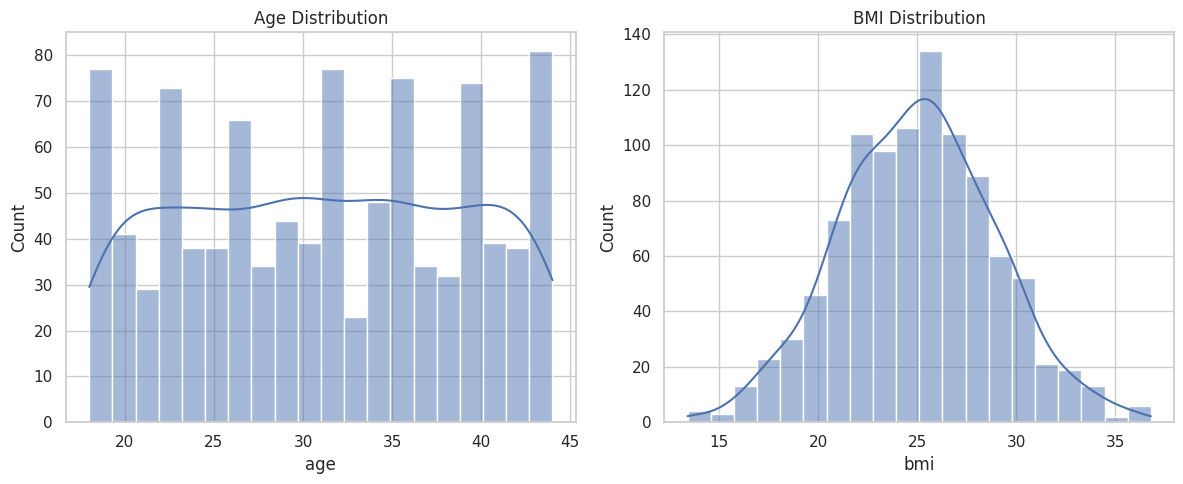

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(hormonal_bc['age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(hormonal_bc['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.savefig("../visualizations/age_bmi_distribution.png", dpi=300)
plt.show()

### 7. Bar chart of Birth Control types

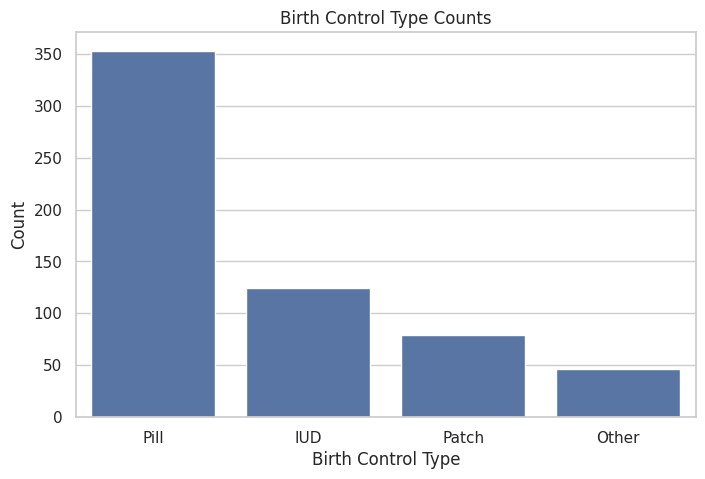

In [38]:
plt.figure(figsize=(8,5))
bc_counts = hormonal_bc[hormonal_bc['bc_type'] != 'NA']['bc_type'].value_counts()
sns.barplot(x=bc_counts.index, y=bc_counts.values)
plt.title('Birth Control Type Counts')
plt.xlabel('Birth Control Type')
plt.ylabel('Count')
plt.show()

### 8. Mood scores over time for 3 random participants

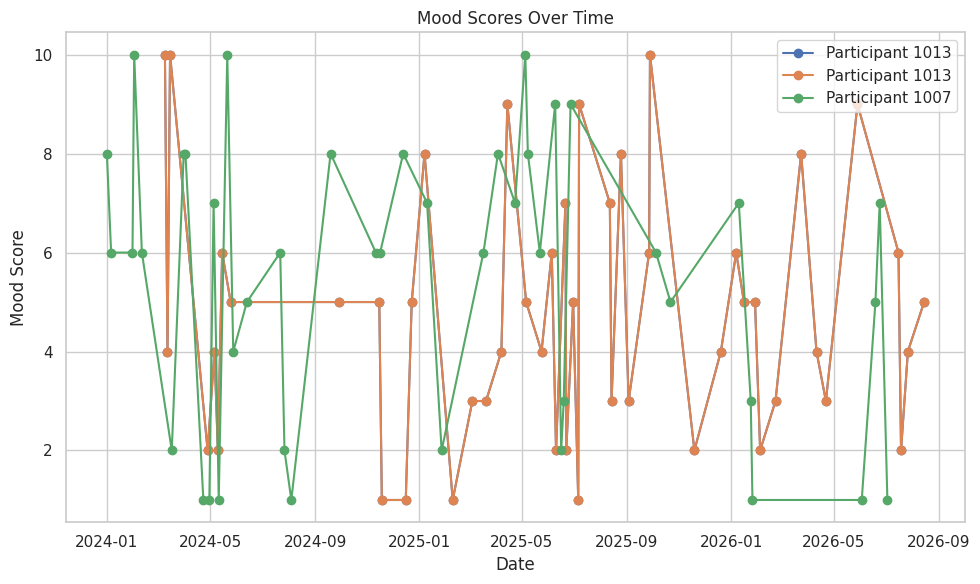

In [39]:
sample_ids = mood['participant_id'].sample(3, random_state=42).values

plt.figure(figsize=(10,6))
for pid in sample_ids:
    subset = mood[mood['participant_id'] == pid]
    subset = subset.sort_values('date')
    plt.plot(pd.to_datetime(subset['date']), subset['mood_score'], marker='o', label=f'Participant {pid}')

plt.title('Mood Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Mood Score')
plt.legend()
plt.tight_layout()
plt.savefig("../visualizations/mood_scores_over_time.png", dpi=300)
plt.show()

### 9. Boxplots of metabolic markers by hormonal BC use

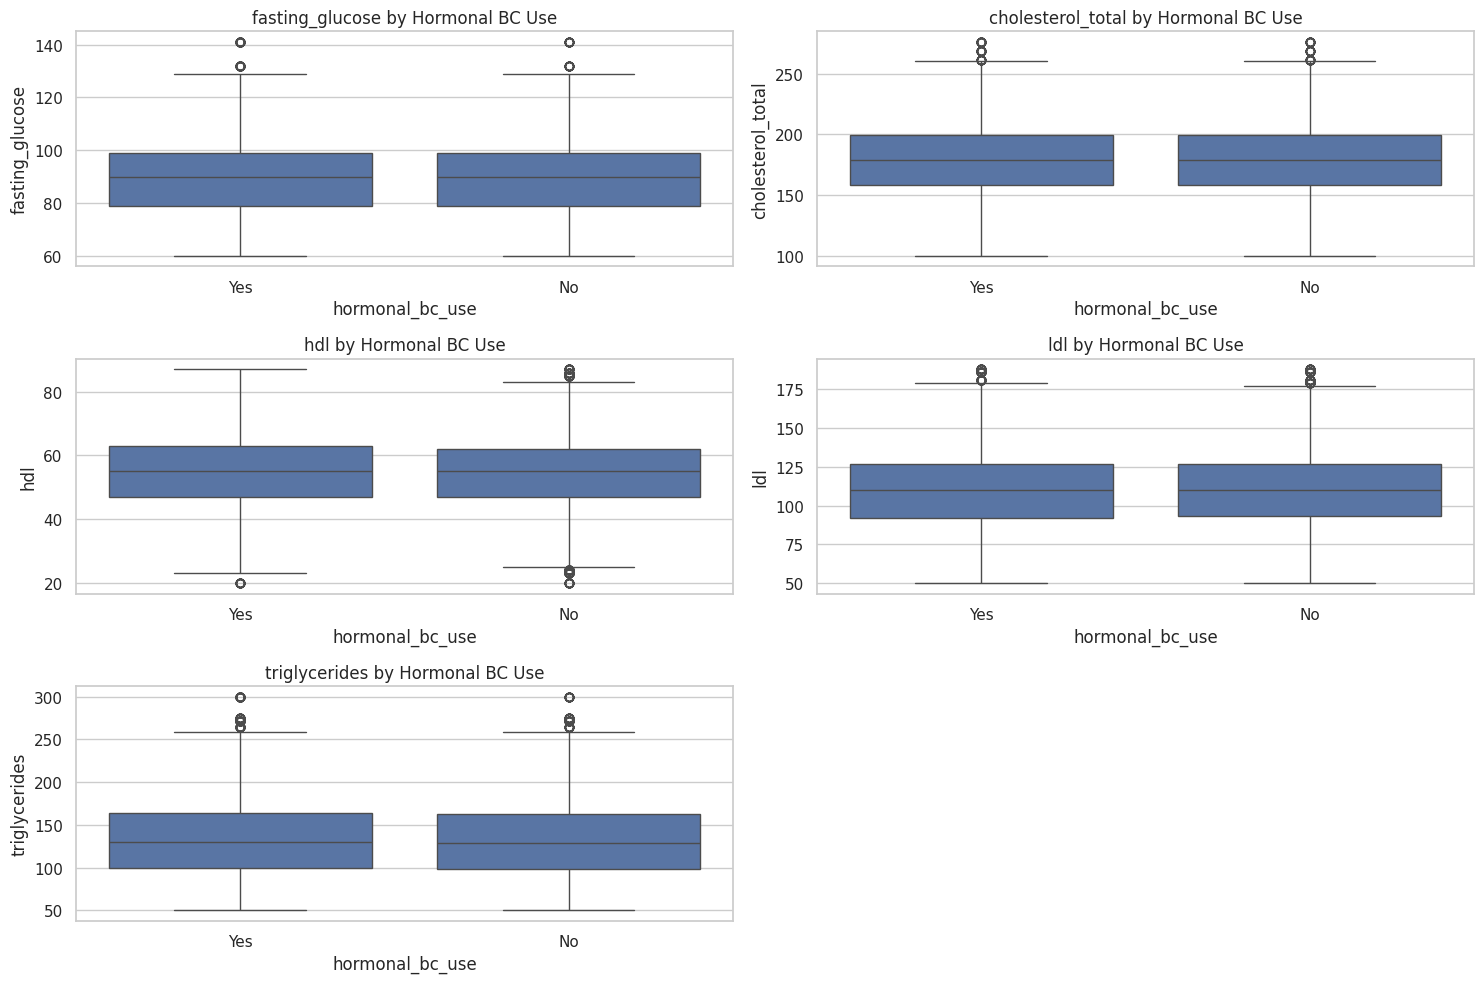

In [40]:
plt.figure(figsize=(15,10))
markers = ['fasting_glucose', 'cholesterol_total', 'hdl', 'ldl', 'triglycerides']

for i, marker in enumerate(markers, 1):
    plt.subplot(3, 2, i)
    merged = pd.merge(metabolic, hormonal_bc[['participant_id', 'hormonal_bc_use']], on='participant_id')
    sns.boxplot(x='hormonal_bc_use', y=marker, data=merged)
    plt.title(f'{marker} by Hormonal BC Use')

plt.tight_layout()
plt.savefig("../visualizations/metabolic_by_bc_use.png", dpi=300)
plt.show()

### 10. Correlation matrix of metabolic markers


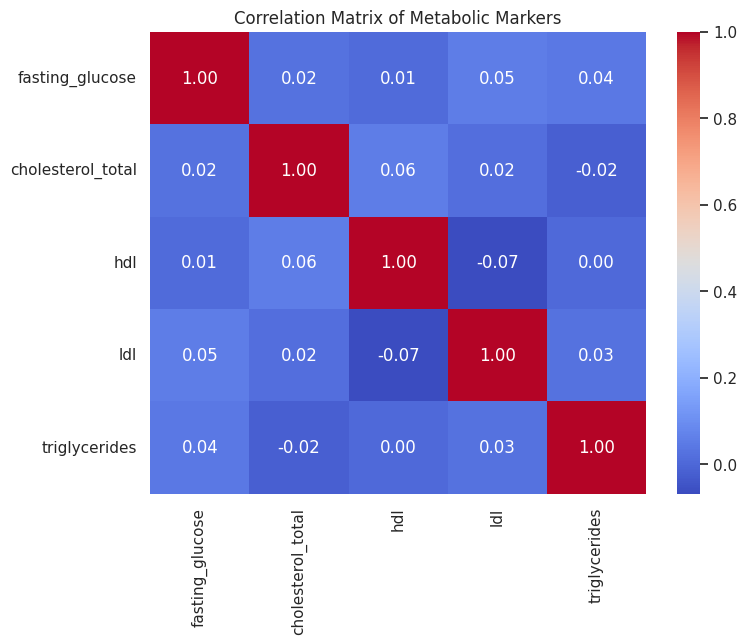

In [41]:
plt.figure(figsize=(8,6))
corr = metabolic[markers].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Metabolic Markers')
plt.show()

### 11. Grouped summary statistics by hormonal BC use

In [42]:
# grouped dataset
grouped = merged.groupby('hormonal_bc_use')[markers].agg(['mean', 'std', 'count'])
print("Metabolic Markers Summary by Hormonal BC Use:")
print(grouped)

Metabolic Markers Summary by Hormonal BC Use:
                fasting_glucose                   cholesterol_total  \
                           mean        std  count              mean   
hormonal_bc_use                                                       
No                    89.376729  14.591868  19879        178.544947   
Yes                   89.538265  14.495860  31373        178.662002   

                                         hdl                           ldl  \
                       std  count       mean        std  count        mean   
hormonal_bc_use                                                              
No               30.267348  19879  54.581317  11.591294  19879  109.573771   
Yes              29.892088  31373  54.760782  11.554586  31373  109.331208   

                                  triglycerides                    
                       std  count          mean        std  count  
hormonal_bc_use                                                    
No 

### 12. Scatter plot of BMI vs fasting_glucose colored by hormonal BC use

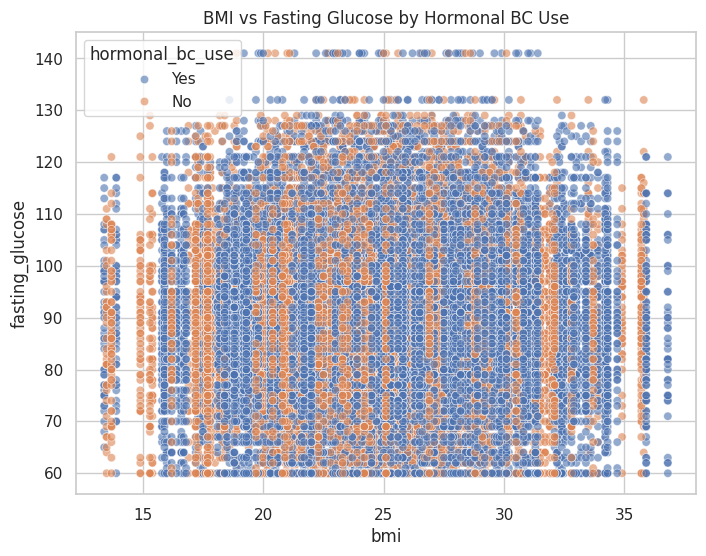

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='bmi', y='fasting_glucose',
    hue='hormonal_bc_use',
    data=pd.merge(hormonal_bc, metabolic, on='participant_id'),
    alpha=0.6
)
plt.title('BMI vs Fasting Glucose by Hormonal BC Use')
plt.show()